# The information about used cars data, we can use it for a lot of purposes such as price prediction.

In [389]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# **Loading Dataset**

In [390]:
df = pd.read_csv('CAR.csv')

In [391]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# **Performing EDA**


In [392]:
df.shape

(4340, 8)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [394]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [395]:
x = df.pop('name')

In [396]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [397]:
df2 = df.copy()
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [398]:
df2['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [399]:
x = df2.pop('owner')

In [400]:
x = x.replace(to_replace = 'First Owner' , value = 0)
x = x.replace(to_replace = 'Second Owner' , value = 1)
x = x.replace(to_replace = 'Third Owner' , value = 2)
x = x.replace(to_replace = 'Fourth & Above Owner' , value = 3)
x = x.replace(to_replace = 'Test Drive Car' , value = 4)

In [401]:
x

0       0
1       0
2       0
3       0
4       1
       ..
4335    1
4336    1
4337    1
4338    0
4339    0
Name: owner, Length: 4340, dtype: int64

In [402]:
df2['owner'] = x
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,0
1,2007,135000,50000,Petrol,Individual,Manual,0
2,2012,600000,100000,Diesel,Individual,Manual,0
3,2017,250000,46000,Petrol,Individual,Manual,0
4,2014,450000,141000,Diesel,Individual,Manual,1


In [403]:
#applying label encoding on Owner column
'''
my_dict = {
    'First Owner' : 0,
    'Second Owner' : 1,
    'Third Owner' : 2,
    'Fourth & Above Owner' : 3
}
df2['owner_new'] = df['owner'].map(my_dict)
df2['owner_new'].head()
'''

"\nmy_dict = {\n    'First Owner' : 0,\n    'Second Owner' : 1,\n    'Third Owner' : 2,\n    'Fourth & Above Owner' : 3\n}\ndf2['owner_new'] = df['owner'].map(my_dict)\ndf2['owner_new'].head()\n"

In [404]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 237.5+ KB


In [405]:
#droping old column
#df2.drop('owner',axis = 1,inplace = True)


In [406]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,0
1,2007,135000,50000,Petrol,Individual,Manual,0
2,2012,600000,100000,Diesel,Individual,Manual,0
3,2017,250000,46000,Petrol,Individual,Manual,0
4,2014,450000,141000,Diesel,Individual,Manual,1


In [407]:
#applying label encoding on transmission column
my_dict = {
    'Manual' : 0,
    'Automatic' : 1
}
df2['transmission_new'] = df['transmission'].map(my_dict)
df2['transmission_new'].head()

0    0
1    0
2    0
3    0
4    0
Name: transmission_new, dtype: int64

In [408]:
#droping old column
df2.drop('transmission',axis = 1,inplace = True)

In [409]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,owner,transmission_new
0,2007,60000,70000,Petrol,Individual,0,0
1,2007,135000,50000,Petrol,Individual,0,0
2,2012,600000,100000,Diesel,Individual,0,0
3,2017,250000,46000,Petrol,Individual,0,0
4,2014,450000,141000,Diesel,Individual,1,0


In [410]:
#applying label encoding on fuel column
my_dict = {
    'Diesel' : 0,
    'Petrol' : 1,
    'Electric' : 2,
    'LPG' : 3,
    'CNG' : 4
}
df2['fuel_new'] = df['fuel'].map(my_dict)
df2['fuel_new'].head()

0    1
1    1
2    0
3    1
4    0
Name: fuel_new, dtype: int64

In [411]:
#droping old column
df2.drop('fuel',axis = 1,inplace = True)

In [412]:
df2.head()

,year,selling_price,km_driven,seller_type,owner,transmission_new,fuel_new
0,2007,60000,70000,Individual,0,0,1
1,2007,135000,50000,Individual,0,0,1
2,2012,600000,100000,Individual,0,0,0
3,2017,250000,46000,Individual,0,0,1
4,2014,450000,141000,Individual,1,0,0


In [413]:
df2['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [414]:
#applying label encoding on seller_type column
my_dict = {
    'Individual' : 0,
    'Dealer' : 1,
    'Trustmark Dealer' : 2  
}
df2['seller_type_new'] = df['seller_type'].map(my_dict)
df2['seller_type_new'].head()

0    0
1    0
2    0
3    0
4    0
Name: seller_type_new, dtype: int64

In [415]:
#droping old column
df2.drop('seller_type',axis = 1,inplace = True)

In [416]:
df2.head()

,year,selling_price,km_driven,owner,transmission_new,fuel_new,seller_type_new
0,2007,60000,70000,0,0,1,0
1,2007,135000,50000,0,0,1,0
2,2012,600000,100000,0,0,0,0
3,2017,250000,46000,0,0,1,0
4,2014,450000,141000,1,0,0,0


In [417]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              4340 non-null   int64
 1   selling_price     4340 non-null   int64
 2   km_driven         4340 non-null   int64
 3   owner             4340 non-null   int64
 4   transmission_new  4340 non-null   int64
 5   fuel_new          4340 non-null   int64
 6   seller_type_new   4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [418]:
X = df2.loc[:,df2.columns != 'selling_price']
Y = df2['selling_price']

In [419]:
X.shape


(4340, 6)

In [420]:
Y.shape

(4340,)

In [421]:
Y = Y.values.reshape(-1,1)



In [422]:
Y.shape

(4340, 1)

In [423]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

In [424]:
#creating linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [425]:
#fitting the training data
model.fit(X_train,y_train)

LinearRegression()

In [426]:
#Predictions
y_pred = model.predict(X_test)

In [427]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4697837606389127

In [428]:
import seaborn as sns

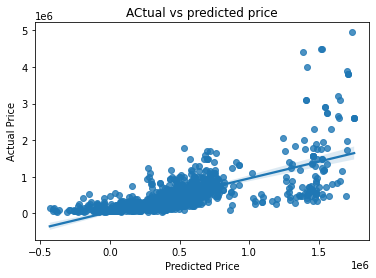

In [429]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()